In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV



data = pd.read_csv('fake reviews dataset.csv')


C:\Users\MIDor\AppData\Local\Temp\ipykernel_11828\3559331978.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='rating', palette='viridis')


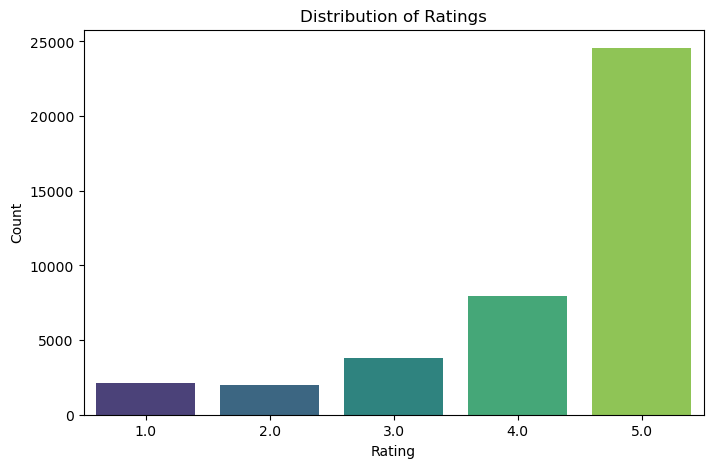

C:\Users\MIDor\AppData\Local\Temp\ipykernel_11828\3559331978.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='category', palette='Set2', order=data['category'].value_counts().index)


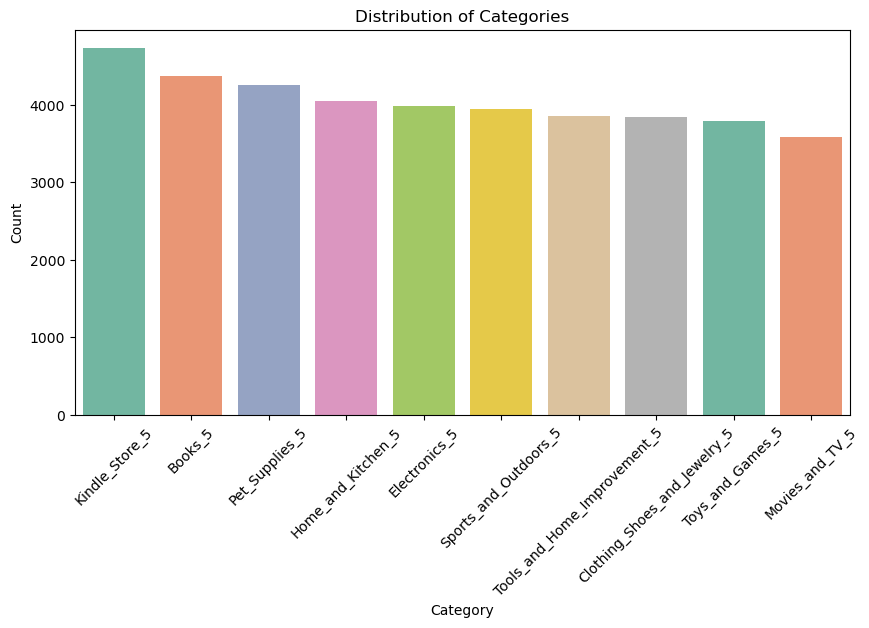

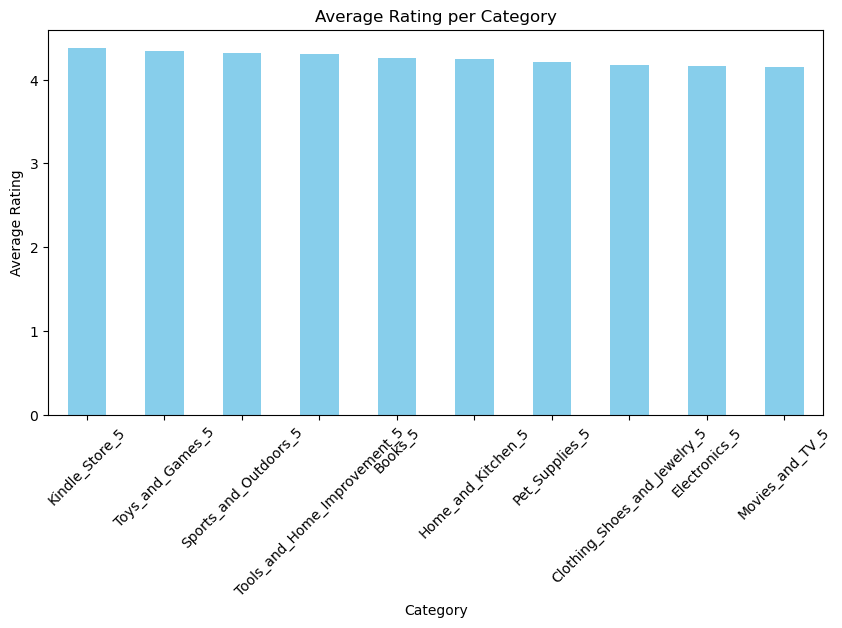

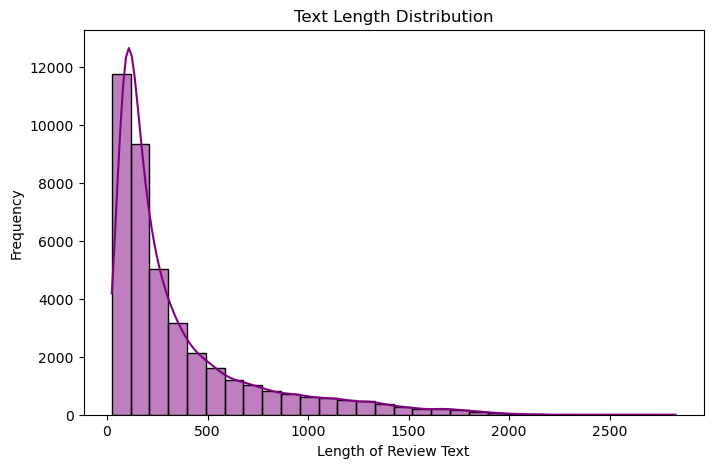

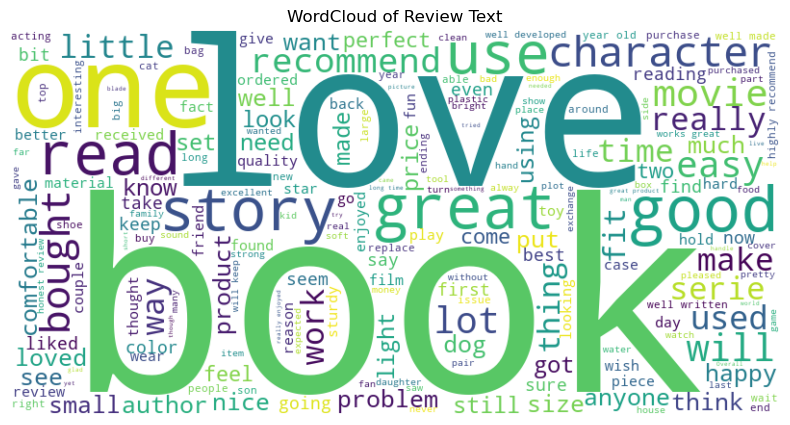

In [2]:
# Distribution of ratings
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='rating', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Distribution of categories
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='category', palette='Set2', order=data['category'].value_counts().index)
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Average rating per category
category_rating = data.groupby('category')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
category_rating.plot(kind='bar', color='skyblue')
plt.title('Average Rating per Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

# Analyze text length
data['text_length'] = data['text_'].apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(data['text_length'], bins=30, kde=True, color='purple')
plt.title('Text Length Distribution')
plt.xlabel('Length of Review Text')
plt.ylabel('Frequency')
plt.show()

# Check most frequent words (optional: install wordcloud for visualization)
from wordcloud import WordCloud

text_combined = " ".join(data['text_'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Review Text')
plt.show()

In [ ]:

label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])

X = data['text_']
y = data['label_encoded']

# Tokenization
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

max_len = 100
X_padded = pad_sequences(X_seq, maxlen=max_len, padding='post')

trainX, testX, trainY, testY = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [3]:

X = data['text_']
y = data['label_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0]}
naive_bayes_classifier = GridSearchCV(MultinomialNB(), param_grid, cv=5)
naive_bayes_classifier.fit(X_train_tfidf, y_train)

y_pred = naive_bayes_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

def predict_fake_review(text):
    text_tfidf = tfidf_vectorizer.transform([text])
    prediction = naive_bayes_classifier.predict(text_tfidf)[0]
    return "Fake" if prediction == 1 else "Not Fake" # Assuming 1 represents fake

# Example usage
example_review = "This product is amazing! I highly recommend it."
predicted_label = predict_fake_review(example_review)
print(f"Review: {example_review}")
print(f"Prediction: {predicted_label}")


Accuracy: 0.8706566093730679
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      4016
           1       0.88      0.85      0.87      4071

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087

Review: This product is amazing! I highly recommend it.
Prediction: Not Fake


In [4]:



# Preprocessing: Encode the labels (A or CG)
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])  # "A" -> 0, "CG" -> 1

# Extract features and labels
X = data['text_']
y = data['label_encoded']

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)  # Keep the top 10,000 words
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Pad the sequences to ensure uniform input length
max_len = 100  # Maximum length of a sequence
X_padded = pad_sequences(X_seq, maxlen=max_len, padding='post')

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128),  # Embedding layer
    LSTM(64, return_sequences=True),             # First LSTM layer
    Dropout(0.2),                                # Dropout to prevent overfitting
    LSTM(32, return_sequences=True),             # Second LSTM layer (new)
    Dropout(0.2),                                # Additional dropout layer
    LSTM(16),                                    # Third LSTM layer (already present)
    Dense(32, activation='relu'),                # Additional Dense layer (new)
    Dense(1, activation='sigmoid')               # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predict on new data
def predict_label(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_len, padding='post')
    prediction = model.predict(padded)
    label = label_encoder.inverse_transform([int(prediction[0] > 0.5)])[0]
    return label


Epoch 1/20
809/809 ━━━━━━━━━━━━━━━━━━━━ 74s 79ms/step - accuracy: 0.6245 - loss: 0.6466 - val_accuracy: 0.7238 - val_loss: 0.5449
Epoch 2/20
809/809 ━━━━━━━━━━━━━━━━━━━━ 64s 79ms/step - accuracy: 0.8237 - loss: 0.4176 - val_accuracy: 0.9136 - val_loss: 0.2130
Epoch 3/20
809/809 ━━━━━━━━━━━━━━━━━━━━ 64s 79ms/step - accuracy: 0.9378 - loss: 0.1736 - val_accuracy: 0.9278 - val_loss: 0.1962
Epoch 4/20
809/809 ━━━━━━━━━━━━━━━━━━━━ 64s 79ms/step - accuracy: 0.9572 - loss: 0.1221 - val_accuracy: 0.9273 - val_loss: 0.1945
Epoch 5/20
809/809 ━━━━━━━━━━━━━━━━━━━━ 63s 78ms/step - accuracy: 0.9730 - loss: 0.0780 - val_accuracy: 0.9270 - val_loss: 0.2147
Epoch 6/20
809/809 ━━━━━━━━━━━━━━━━━━━━ 62s 77ms/step - accuracy: 0.9807 - loss: 0.0598 - val_accuracy: 0.9247 - val_loss: 0.2228
Epoch 7/20
809/809 ━━━━━━━━━━━━━━━━━━━━ 63s 78ms/step - accuracy: 0.9856 - loss: 0.0431 - val_accuracy: 0.9164 - val_loss: 0.2638
Epoch 8/20
809/809 ━━━━━━━━━━━━━━━━━━━━ 63s 77ms/step - accuracy: 0.9881 - loss: 0.0386 - 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])  

X = data['text_']
y = data['label_encoded']

# Tokenization
tokenizer = Tokenizer(num_words=10000)  # Keep the top 10000 words
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

max_len = 100  
X_padded = pad_sequences(X_seq, maxlen=max_len, padding='post')

X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

model = Sequential([
    Embedding(input_dim=10000, output_dim=128),         # Embedding layer
    LSTM(64, return_sequences=True),                   # First LSTM layer
    Dropout(0.3),                                       # Increased dropout
    LSTM(32, return_sequences=True),                   # Second LSTM layer
    Dropout(0.3),                                       # Additional dropout
    LSTM(16, kernel_regularizer=l2(0.01)),             # Third LSTM with L2 regularization
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # Dense layer with L2 regularization
    Dropout(0.3),                                       # Dropout before final output
    Dense(1, activation='sigmoid')                     # Output layer for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping, LR Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

history = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=32, 
    validation_split=0.2, 
    callbacks=[early_stopping, lr_scheduler]
)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predict on new data
def predict_label(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_len, padding='post')
    prediction = model.predict(padded)
    label = label_encoder.inverse_transform([int(prediction[0] > 0.5)])[0]
    return label

# Example 
example_text = "This is a spam email example."
print(f"Predicted Label: {predict_label(example_text)}")


Epoch 1/10
809/809 ━━━━━━━━━━━━━━━━━━━━ 73s 77ms/step - accuracy: 0.5448 - loss: 0.8930 - val_accuracy: 0.5529 - val_loss: 0.6861 - learning_rate: 0.0010
Epoch 2/10
809/809 ━━━━━━━━━━━━━━━━━━━━ 61s 75ms/step - accuracy: 0.5586 - loss: 0.6858 - val_accuracy: 0.4981 - val_loss: 0.6970 - learning_rate: 0.0010
Epoch 3/10
809/809 ━━━━━━━━━━━━━━━━━━━━ 60s 75ms/step - accuracy: 0.5246 - loss: 0.6890 - val_accuracy: 0.4981 - val_loss: 0.6975 - learning_rate: 0.0010
Epoch 4/10
809/809 ━━━━━━━━━━━━━━━━━━━━ 60s 75ms/step - accuracy: 0.6289 - loss: 0.6291 - val_accuracy: 0.8578 - val_loss: 0.3921 - learning_rate: 5.0000e-04
Epoch 5/10
809/809 ━━━━━━━━━━━━━━━━━━━━ 61s 76ms/step - accuracy: 0.8998 - loss: 0.3079 - val_accuracy: 0.9139 - val_loss: 0.2461 - learning_rate: 5.0000e-04
Epoch 6/10
809/809 ━━━━━━━━━━━━━━━━━━━━ 72s 89ms/step - accuracy: 0.9462 - loss: 0.1934 - val_accuracy: 0.9239 - val_loss: 0.2122 - learning_rate: 5.0000e-04
Epoch 7/10
809/809 ━━━━━━━━━━━━━━━━━━━━ 72s 89ms/step - accuracy

C:\Users\MIDor\AppData\Local\Temp\ipykernel_11828\2570114583.py:71: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = label_encoder.inverse_transform([int(prediction[0] > 0.5)])[0]


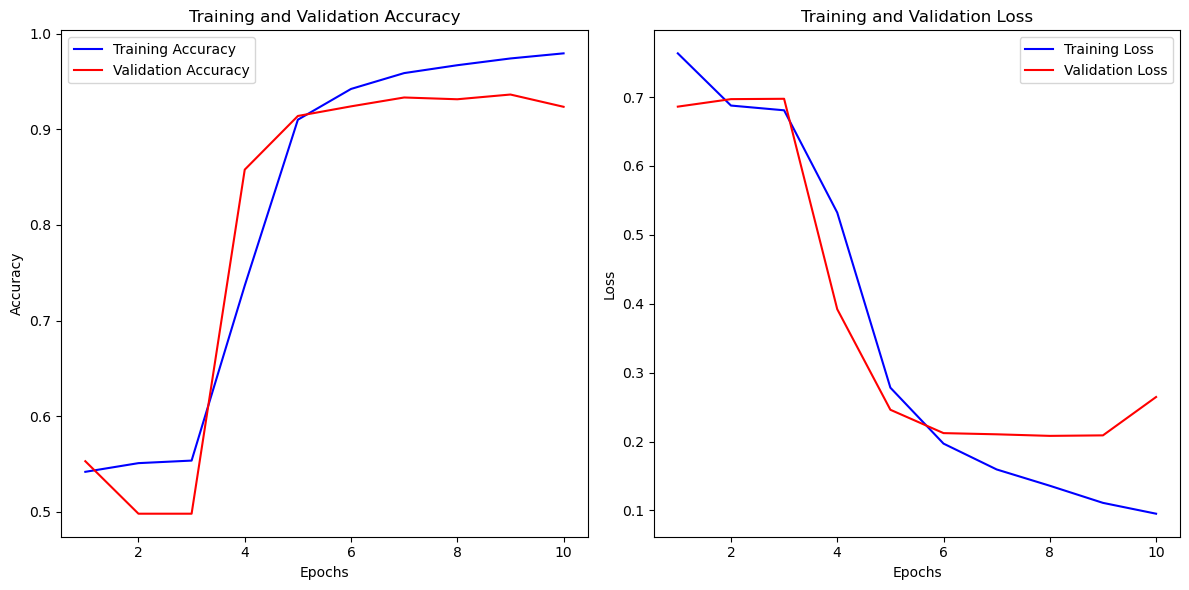

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [16]:
example_text = "Really good product and I recommend it to everyone."
print(f"Example review: {example_text }\nPredicted Label: {predict_label(example_text)}")

example_text2 = "The book is really interesting and well-written. I like the ending a lot."
print(f"Example review: {example_text2 }\nPredicted Label: {predict_label(example_text2)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Example review: Really good product and I recommend it to everyone.
Predicted Label: OR
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Example review: The book is really interesting and well-written. I like the ending a lot.
Predicted Label: CG


C:\Users\MIDor\AppData\Local\Temp\ipykernel_11828\2570114583.py:71: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = label_encoder.inverse_transform([int(prediction[0] > 0.5)])[0]
C:\Users\MIDor\AppData\Local\Temp\ipykernel_11828\2570114583.py:71: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = label_encoder.inverse_transform([int(prediction[0] > 0.5)])[0]
